# Finding the Best Markets to Advertise In

Make the assumption that we are working for an e-learning company that offers courses on programming. There are courses in several domains such as web development and data science. The goal for this project is to determine where we should spend money on advertisement to promote our product.

FreeCodeCamp is an existing online learning platform with a large following on the blog site Medium. The over 400,000 followers have varying interests and would be ideal for this analysis. They collected survey data from their followers and posted it to [this github repository.](https://github.com/freeCodeCamp/2017-new-coder-survey)

Using the data from FreeCodeCamp will save us a lot of expense and effort of surveying users ourselves.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Checking for Sample Representativity

Let's first explore the `JobRoleInterest` column to see if people in the survey would be interested in our primarily web/mobile development content.

Let's examine a frequency table normalized to percentages

In [4]:
data['JobRoleInterest'].value_counts()  / len(data) * 100

Full-Stack Web Developer                                                                                                                                                              4.528198
  Front-End Web Developer                                                                                                                                                             2.475928
  Data Scientist                                                                                                                                                                      0.836314
Back-End Web Developer                                                                                                                                                                0.781293
  Mobile Developer                                                                                                                                                                    0.643741
Game Developer                               

It looks like poeple can be interested in more than one subject. Let's first take a look at how many subjects people are interested in studying.

In [5]:
data['JobRoleCount'] = data['JobRoleInterest'].str.count(r'\w+,') + 1
(data['JobRoleCount'].value_counts(dropna=False) / len(data) * 100).sort_values(ascending=False)

NaN      61.529574
 1.0     12.176066
 3.0      6.112792
 4.0      5.854195
 5.0      4.632737
 2.0      4.187070
 6.0      2.585970
 7.0      1.485557
 8.0      0.676754
 9.0      0.379642
 10.0     0.181568
 12.0     0.115543
 11.0     0.071527
 13.0     0.011004
Name: JobRoleCount, dtype: float64

26.29436038514443


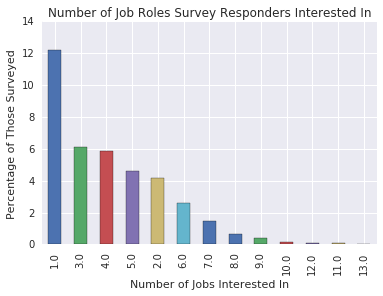

In [6]:
(data['JobRoleCount'].value_counts() / len(data) * 100).plot.bar()
plt.xlabel('Number of Jobs Interested In')
plt.ylabel('Percentage of Those Surveyed')
plt.title('Number of Job Roles Survey Responders Interested In')

percent_multiple_roles = (data['JobRoleCount'].value_counts(dropna=True).iloc[1:] / len(data) * 100).sum()
print(percent_multiple_roles)

62% of those surveyed did not have a response to this question. Of the remainding, 12 percent had one job role interest and 26 percent had 2 or more interests. It is reasonable to include those with multiple interests in our data because a compelling product could persuade them to prioritize the roles that our content features. 

Let's explore the percentage of people who are interested in at least one of our two subjects, web or mobile development.

In [7]:
web_mobile_count = data['JobRoleInterest'].str.contains(r'Web|Mobile').sum()
web_mobile_percent = web_mobile_count / len(data) * 100

print(web_mobile_count)
print(web_mobile_percent)

6034
33.19944979367263


33% of those surveyed are interested in either web or mobile development. Let's go ahead and remove the 62% of the respondants who did not include an interest before we continue our analysis.

In [8]:
data = data[data['JobRoleInterest'].notnull()]

## Finding countries with most survey respondants

Let's find the countries with the highest total number of respondants.

In [9]:
data['CountryLive'].value_counts()

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Hungary                            34
Singapore                          34
New Zealand                        33
Croatia     

In [10]:
data['CountryLive'].value_counts() / len(data) * 100

United States of America         44.693936
India                             7.551487
United Kingdom                    4.505149
Canada                            3.718535
Poland                            1.873570
Brazil                            1.844966
Germany                           1.787757
Australia                         1.601831
Russia                            1.458810
Ukraine                           1.272883
Nigeria                           1.201373
Spain                             1.101259
France                            1.072654
Romania                           1.015446
Netherlands (Holland, Europe)     0.929634
Italy                             0.886728
Serbia                            0.743707
Philippines                       0.743707
Greece                            0.657895
Ireland                           0.614989
South Africa                      0.557780
Mexico                            0.529176
Turkey                            0.514874
Hungary    

Based upon the results above, one would conclude that the two markets we should target first are USA and India. However, we need to know where potential customers are and how much money they are willing to spend on education.

## Spending Money for Education

Let's keep the top 4 countries in our dataset. A good reason to stop at 4 is because these countries have mostly english speakers, our first target language for our curriculum.

In [11]:
country_boolean = ((data['CountryLive'] == 'United States of America') |
                   (data['CountryLive'] == 'India') |
                   (data['CountryLive'] == 'Canada') |
                   (data['CountryLive'] == 'United Kingdom')
                  )
data = data[country_boolean]

We want to know how much money students have for education per month. We can create a new column to calculate this by dividing `MoneyForLearning` by `MonthsProgramming`. We will first convert values of 0 in `MonthsProgramming` to 1 so that we don't have divide by zero errors. We will then drop rows with null values for the newly created column.

In [12]:
data.loc[data['MonthsProgramming'] == 0, 'MonthsProgramming'] = 1

data['MonthlyMoney'] = data['MoneyForLearning'] / data['MonthsProgramming']
data = data[data['MonthlyMoney'].notnull()]

In [13]:
data[['CountryLive', 'MonthlyMoney']].groupby(['CountryLive']).mean().sort_values('MonthlyMoney', ascending=False)

,MonthlyMoney
CountryLive,
United States of America,227.997996
India,135.100982
Canada,113.510961
United Kingdom,45.534443


India has suprisingly high monthly money to spend on education when compared to the other higher GDP countries like  Canada and the UK. This could be true or it could mean:

- The dataset is not representative for India, Canada, & the UK
- There are extreme outliers shifting the mean

Let's visualize if there are outliers by generating box plots

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



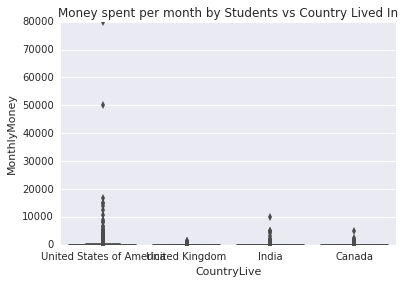

In [14]:
sns.boxplot(x='CountryLive', y='MonthlyMoney', data=data)
plt.title('Money spent per month by Students vs Country Lived In')

Let's try to remove outliers by removing values greater than $4,000 dollars from the dataset

In [17]:
data2 = data[data['MonthlyMoney'] < 4000]
data2[['CountryLive', 'MonthlyMoney']].groupby(['CountryLive']).mean().sort_values('MonthlyMoney', ascending=False)

,MonthlyMoney
CountryLive,
United States of America,119.306296
Canada,93.065400
India,72.893205
United Kingdom,45.534443


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



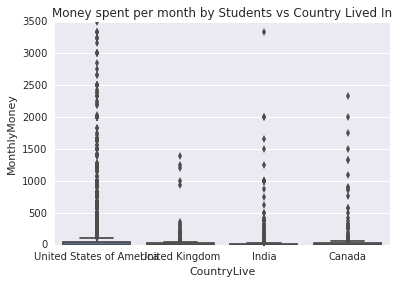

In [18]:
sns.boxplot(x='CountryLive', y='MonthlyMoney', data=data2)
plt.title('Money spent per month by Students vs Country Lived In')

It is clear from the data that we should definitely advertise in the USA and not advertise in the UK. With a monthly subscription cost of $59, both Canada and India would be good candidates for our second country. Because India has over twice as many potential students represented in the survey as Canada, it might make sense to choose India as our second target market.

There are likely different things to consider when choosing between Canada and India, and we may need the help of our marketing team to perform additional surveys or use domain specific knowledge to guide out decision.